# Dagster Pipeline Example: Bitcoin Data Ingestion

This notebook demonstrates how to use a Dagster pipeline to fetch, transform, store, and analyze real-time Bitcoin price data using the CoinGecko API.

For a detailed explanation of the API utilities used in this notebook, refer to: [`bitcoin_dagster.API.md`](./bitcoin_dagster.API.md)

All logic is imported from `bitcoin_dagster_utils.py.

This notebook assumes you've defined a Dagster pipeline and are running dagit at http://localhost:3000

# Why Dagster?

- **Modular & Scalable**: Dagster structures your pipeline into reusable `@op`s and `job`s, making it easy to develop, debug, and extend.
  
- **Built-in Scheduling**: Run your Bitcoin data pipeline automatically at regular intervals using `ScheduleDefinition` — no cron jobs needed.

- **Visual Monitoring**: Dagster provides a powerful web UI (Dagit) to view pipeline runs, logs, and step-by-step execution details.

- **Resilient Execution**: Handles retries, error boundaries, and exceptions gracefully — essential for real-time ingestion from APIs.

- **Easy Integration**: Works seamlessly with APIs (like CoinGecko), data storage (CSV/SQLite), and analysis libraries (Pandas, Matplotlib).


## Setup and Imports

### 1. Importing Dependencies

We begin by importing necessary packages and the utility functions defined in Dagster_utils.

In [3]:
from Dagster_utils import (
    fetch_bitcoin_price,
    process_price_data,
    save_to_csv,
    get_historical_bitcoin_data,
    calculate_moving_average,
    detect_trend,
    detect_anomalies_zscore,
    plot_price_with_moving_average,
    fit_arima_model,
    plot_arima_forecast
)

import warnings
warnings.filterwarnings("ignore")

### 2. Fetch Real-time Bitcoin Price

In [4]:
# Fetch current price from CoinGecko
price_data = fetch_bitcoin_price()
df_live = process_price_data(price_data)

print("Current Bitcoin Price:")
print(df_live)

Current Bitcoin Price:
                   timestamp   price
0 2025-05-17 14:11:57.939474  103223


### 3. Save Real-time Price to CSV

In [5]:
# Save current data point to local CSV
save_to_csv(df_live, filepath="bitcoin_prices.csv")

print("Data saved to bitcoin_prices.csv")

Data saved to bitcoin_prices.csv


###  4. Load Historical Price Data

In [6]:
# Load last 180 days of Bitcoin historical data
df_hist = get_historical_bitcoin_data(days=365)
df_hist.head()

,date,price
0,2024-05-18,67053.123265
1,2024-05-19,66912.618614
2,2024-05-20,66252.712596
3,2024-05-21,71430.297002
4,2024-05-22,70189.835818


### 5. Calculate Moving Average

In [7]:
# Calculate moving average (5-day default)
df_ma = calculate_moving_average(df_hist, window_days=5)
df_ma.head()

,date,price,moving_average
0,2024-05-18,67053.123265,67053.123265
1,2024-05-19,66912.618614,66982.870940
2,2024-05-20,66252.712596,66739.484825
3,2024-05-21,71430.297002,67912.187869
4,2024-05-22,70189.835818,68367.717459


### 6. Detect trends and anomolies

In [8]:
trend = detect_trend(df_ma)
print(f" Detected trend: {trend}")

df_anom = detect_anomalies_zscore(df_ma)
df_anom[df_anom["anomaly"] == True].head()

 Detected trend: upward


,date,price,moving_average,z_score,anomaly


### 7.  Plot Price with Moving Average

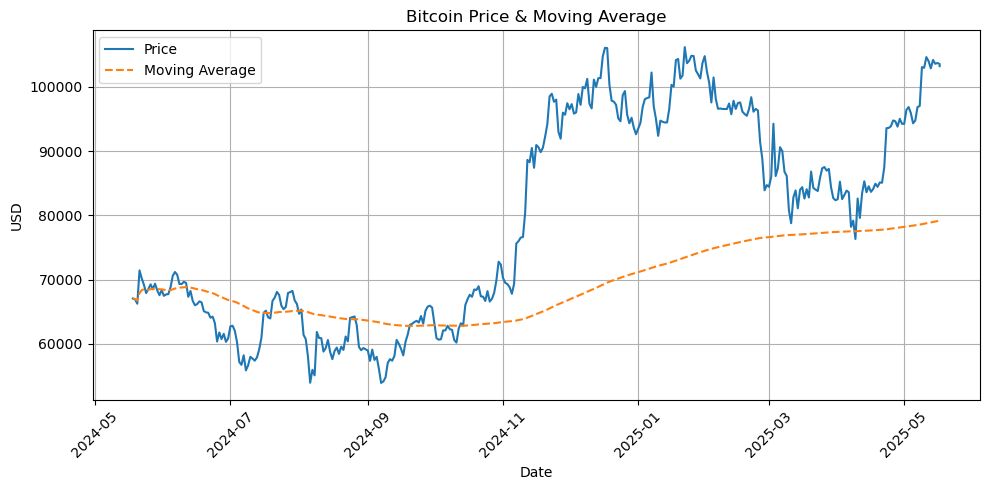

In [9]:
# Plot Bitcoin price + moving average overlay
plot_price_with_moving_average(df_ma)

### 8. Forecast Future Prices with ARIMA

Forecasting Bitcoin prices for the next 30 days using ARIMA...


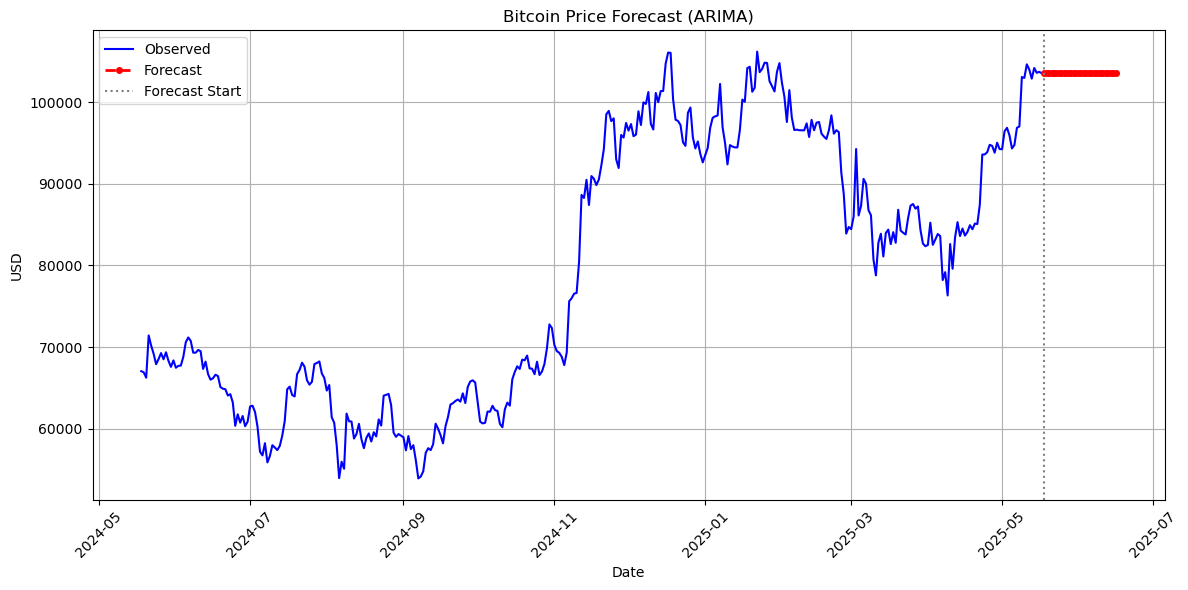

In [10]:
print("Forecasting Bitcoin prices for the next 30 days using ARIMA...")
forecast_df = fit_arima_model(df_hist, order=(5, 1, 0), forecast_steps=30)
plot_arima_forecast(forecast_df, forecast_steps=30)